<a href="https://colab.research.google.com/github/AleksTurov/Data-Science/blob/main/hadoop/Stepic_hadoop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stepic hadoop



## 3.5 Hadoop Streaming

Напишите программу, которая реализует mapper для задачи WordCount в Hadoop Streaming.  
  
Sample Input:  
  
Vivere est cogitare  
Vivere militate est  
Scientia potentia est  
Sample Output:  
  
Vivere	1  
est	1  
cogitare	1  
Vivere	1  
militate	1  
est	1  
Scientia	1  
potentia	1  
est	1  
Напишите программу. Тестируется через stdin → stdout  

In [ ]:
#!/usr/bin/env python

import sys
import subprocess

for line in sys.stdin:
    # удаление начальных и конечных пробелов
    line = line.strip()

    # разделение строки на слова
    words = line.split()

    # итерация по словам в строке и вывод пары ключ-значение
    for word in words:
        # вывод ключа-слова и значения-единицы
        print(word + "\t1")



Напишите программу, которая реализует reducer для задачи WordCount в Hadoop Streaming.
Sample Input:  
  
cogitare	1  
est	1  
est	1  
est	1  
militate	1  
potentia	1  
Scientia	1  
Vivere	1  
Vivere	1  
Sample Output:  
  
cogitare	1  
est	3  
militate	1  
potentia	1  
Scientia	1  
Vivere	2  
Напишите программу. Тестируется через stdin → stdout  

In [ ]:
# put your python code here
#!/usr/bin/env python

import sys

current_word = None
current_count = 0

# проход по строкам, полученным из stdin
for line in sys.stdin:
    # разбиение строки на слово и его частоту
    word, count = line.strip().split('\t')
    count = int(count)
    
    # обработка слова
    if word == current_word:
        current_count += count
    else:
        # вывод результата для предыдущего слова
        if current_word:
            print(f"{current_word}\t{current_count}")
        # обновление значения текущего слова
        current_word = word
        current_count = count

# вывод результата для последнего слова
if current_word:
    print(f"{current_word}\t{current_count}")






## 4.1 Алгоритмы на MapReduce


Напишите программу, которая реализует In-mapper combining v.1 для задачи WordCount в Hadoop Streaming.
Sample Input:  
  
aut Caesar aut nihil  
aut aut  
de mortuis aut bene aut nihil  
Sample Output:  
  
nihil	1  
aut	2  
Caesar	1  
aut	2  
nihil	1  
aut	2  
de	1  
bene	1  
mortuis	1  
Напишите программу. Тестируется через stdin → stdout  

In [ ]:
import sys
for line in sys.stdin:
    d = {}
    for i in line.split():
        e = d.get(i)
        if e == None:
            t = 1
        else:  
            t += 1   
        d.update({i:t})
    for key, value in d.items():
        print (f'{key}\t{value}')

Напишите программу, которая реализует In-mapper combining v.2 для задачи WordCount в Hadoop Streaming.
Sample Input:  
  
aut Caesar aut nihil  
aut aut  
de mortuis aut bene aut nihil  
Sample Output:  
  
aut	6  
mortuis	1  
bene	1  
Caesar	1  
de	1  
nihil	2  
Напишите программу. Тестируется через stdin → stdout  

In [ ]:
# put your python code here

#!/usr/bin/env python3

import sys

word_counts = {}

for line in sys.stdin:
    for word in line.strip().split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

for word, count in word_counts.items():
    print(f"{word}\t{count}")





Реализуйте reducer в задаче подсчета среднего времени, проведенного пользователем на странице.  

Mapper передает в reducer данные в виде key / value, где key - адрес страницы, value - число секунд, проведенных пользователем на данной странице.
  
Среднее время на выходе приведите к целому числу.  
  
Sample Input:  

www.facebook.com	100  
www.google.com	10  
www.google.com	5  
www.google.com	15  
www.stepic.org	60  
www.stepic.org	100  
Sample Output:  
  
www.facebook.com	100  
www.google.com	10  
www.stepic.org	80  
Напишите программу. Тестируется через stdin → stdout  

In [ ]:
# put your python code here
import sys

current_url = None
total_time = 0
count = 0

for line in sys.stdin:
    url, time = line.strip().split('\t')
    time = int(time)

    if url != current_url:
        if current_url:
            avg_time = round(total_time / count)
            print(f'{current_url}\t{avg_time}')
        current_url = url
        total_time = 0
        count = 0

    total_time += time
    count += 1

if current_url:
    avg_time = round(total_time / count)
    print(f'{current_url}\t{avg_time}')

Реализуйте Combiner в задаче подсчета среднего времени, проведенного пользователем на странице.
  
Mapper пишет данные в виде key / value, где key - адрес страницы, value - пара чисел, разделенных ";". Первое - число секунд, проведенных пользователем на данной странице, второе равно 1.
  
Sample Input:  
  
www.facebook.com	100;1   
www.google.com	10;1  
www.google.com	5;1  
www.google.com	15;1  
stepic.org	60;1  
stepic.org	100;1  
Sample Output:  
  
www.facebook.com	100;1  
www.google.com	30;3  
stepic.org	160;2  
Напишите программу. Тестируется через stdin → stdout  

In [ ]:
# put your python code here
import sys

current_key = None
total_time = 0
visits = 0

for line in sys.stdin:
    key, value = line.strip().split('\t')
    time, count = map(int, value.split(';'))
    
    if key != current_key:
        if current_key:
            print(current_key + '\t' + str(total_time) + ';' + str(visits))
        current_key = key
        total_time = 0
        visits = 0
    
    total_time += time
    visits += count

if current_key:
    print(current_key + '\t' + str(total_time) + ';' + str(visits))


Реализуйте mapper из фазы 1 задачи Distinct Values v1. 
  
Mapper принимает на вход строку, содержащую значение и через табуляцию список групп, разделенных запятой.
  
Sample Input:  
  
1	a,b  
2	a,d,e  
1	b  
3	a,b  
Sample Output:  
  
1,a	1  
1,b	1  
2,a	1  
2,d	1  
2,e	1  
1,b	1  
3,a	1  
3,b	1  
Напишите программу. Тестируется через stdin → stdout  

In [ ]:
import sys

for line in sys.stdin:
    value, groups = line.strip().split('\t')
    for group in groups.split(','):
        print(f"{value},{group}\t1")


Реализуйте reducer из фазы 1 задачи Distinct Values v1.  
  
Reducer принимает на вход данные, созданные mapper из предыдущей шага.  
  
Sample Input:  
  
1,a	1  
1,b	1  
1,b	1  
2,a	1  
2,d	1  
2,e	1  
3,a	1  
3,b	1  
Sample Output:  
  
1,a  
1,b  
2,a  
2,d  
2,e  
3,a  
3,b  

In [ ]:
import sys

last_word = None

for line in sys.stdin:
    word, _ = line.strip().split('\t')
    if word != last_word:
        print(word)
        last_word = word


Реализуйте mapper из фазы 2 задачи Distinct Values v1.  
  
Mapper принимает на вход строку, содержащую значение и группу, разделенные запятой.  
  
Sample Input:  
  
1,a  
2,a  
3,a  
1,b  
3,b  
2,d  
2,e  
Sample Output:  
  
a	1  
a	1  
a	1  
b	1  
b	1  
d	1  
e	1  
Напишите программу. Тестируется через stdin → stdout  

In [ ]:
# put your python code here
import sys

for line in sys.stdin:
    value, group = line.strip().split(',')
    print(f"{group}\t1")

Реализуйте reducer из задачи Distinct Values v2.  
  
Reducer принимает на вход строки, каждая из которых состоит из разделенных табуляцией значения и названия группы.  
  
Sample Input:  
  
1	a  
1	b  
1	b  
2	a  
2	d  
2	e  
3	a  
3	b  
Sample Output:  
  
a	3  
d	1  
b	2  
e	1  
Напишите программу. Тестируется через stdin → stdout  

In [ ]:
import sys
from collections import defaultdict

d = defaultdict(int)
last = (None, None)

for line in sys.stdin:
    (val, key) = line.strip().split("\t")
    if (val, key) != last:
        d[key] += 1
        last = (val, key)

for key, val in d.items():
    print(key, val, sep = "\t")


Реализуйте mapper для задачи Cross-Correlation, который для каждого кортежа создает все пары элементов, входящих в него.  
  
Mapper принимает на вход кортежи - строки, состоящие из объектов, разделенных пробелом.  
  
Mapper пишет данные в виде key / value, где key - пара объектов, разделенных запятой, value - единица.  
   
Sample Input:  
  
a b  
a b a c  
Sample Output:  
  
a,b	1  
b,a	1  
a,b	1  
a,c	1  
b,a	1  
b,a	1  
b,c	1  
a,b	1  
a,c	1  
c,a	1  
c,b	1  
c,a	1  

In [ ]:
import sys

for line in sys.stdin:
    words = line.strip().split()
    for i in words:
        for j in words:
            if i != j:
                print(i + ',' + j + '\t' + '1')


Реализуйте mapper для задачи Cross-Correlation, который для каждого объекта из кортежа создает stripe.  
  
Mapper принимает на вход кортежи - строки, состоящие из объектов, разделенных пробелом.  
  
Mapper пишет данные в виде key / value, где key - объект, value - соответствующий stripe (пример: a:1,b:2,c:3)  
  
Sample Input:  
  
a b   
a b a c  
Sample Output:  
  
a	b:1  
b	a:1  
a	b:1,c:1  
b	a:2,c:1  
a	b:1,c:1  
c	b:1,a:2  

In [ ]:
import sys

for line in sys.stdin:
    words = line.strip().split(" ")
    for i in words:
        stripe = {}
        for j in words:
            if i != j:
                stripe[j] = stripe.get(j, 0) + 1
        print(i, '\t', ','.join([f'{key}:{val}' for key, val in stripe.items()]), sep='')


Дан файл с логами переходов пользователей. Каждая строка состоит из 3 полей: время перехода (unix timestamp), ID пользователя, URL, на который перешел пользователь.
  
Напишите mapper с помощью Hadoop Streaming, печатающий только те строки из файла, которые соответствуют пользователю user10.  
  
Sample Input:  
  
1448713968	user2	https://ru.wikipedia.org/  
1448764519	user10	https://stepic.org/  
1448713968	user5	http://google.com/  
1448773411	user10	https://stepic.org/explore/courses  
1448709864	user3	http://vk.com/  
Sample Output:  
  
1448764519	user10	https://stepic.org/  
1448773411	user10	https://stepic.org/explore/courses   

In [ ]:
# put your python code here
#!/usr/bin/env python3

import sys

for line in sys.stdin:
    fields = line.strip().split("\t")
    if fields[1] == "user10":
        print(line.strip())

## 4.2 Реляционные функции

Дан файл с логами переходов пользователей. Каждая строка состоит из 3 полей: время перехода (unix timestamp), ID пользователя, URL, на который перешел пользователь.  
  
Напишите mapper с помощью Hadoop Streaming, печатающий только те строки из файла, которые соответствуют пользователю user10.  
  
Sample Input:  
  
1448713968	user2	https://ru.wikipedia.org/  
1448764519	user10	https://stepic.org/  
1448713968	user5	http://google.com/  
1448773411	user10	https://stepic.org/explore/courses  
1448709864	user3	http://vk.com/  


In [ ]:
# put your python code here
#!/usr/bin/env python3

import sys

for line in sys.stdin:
    fields = line.strip().split("\t")
    if fields[1] == "user10":
        print(line.strip())


Дан файл с логами переходов пользователей. Каждая строка состоит из 3 полей: время перехода (unix timestamp), ID пользователя, URL, на который перешел пользователь.  
  
Напишите mapper с помощью Hadoop Streaming, печатающий URL из каждой строки.  
  
Sample Input:  
  
1448713968	user2	https://ru.wikipedia.org/  
1448764519	user10	https://stepic.org/  
1448713968	user5	http://google.com/  
1448773411	user10	https://stepic.org/explore/courses  
1448709864	user3	http://vk.com/  

In [ ]:
# put your python code here
#!/usr/bin/env python3

import sys

for line in sys.stdin:
    fields = line.strip().split("\t")
    print(fields[2])

Напишите reducer, который объединяет элементы из множества A и B. На вход в reducer приходят пары key / value, где key - элемент множества, value - маркер множества (A или B)  
  
Sample Input:  
  
1	A  
2	A  
2	B  
3	B  
Sample Output:  
  
1  
2  
3  

In [ ]:
import sys
a,b =set(),set()
for line in sys.stdin:
    id, key = line.strip().split("\t")
    if key == "A":
        a.add(id)
    else:
        b.add(id)  
r = sorted(a|b)
for i in r:
    print (i)

Напишите reducer, который делает пересечение элементов из множества A и B. На вход в reducer приходят пары key / value, где key - элемент множества, value - маркер множества (A или B)  
Sample Input:  
  
1	A  
2	A  
2	B  
3	B  
Sample Output:  
  
2  

In [ ]:
import sys

current_key = None
current_set = set()

for line in sys.stdin:
    key, value = line.strip().split('\t')
    
    if key == current_key:
        current_set.add(value)
    else:
        if len(current_set) == 2:
            print(current_key)
        current_key = key
        current_set = {value}

if len(current_set) == 2:
    print(current_key)


Напишите reducer, который делает вычитание элементов множества B из множества A. На вход в reducer приходят пары key / value, где key - элемент множества, value - маркер множества (A или B)  
Sample Input:  
  
1	A  
2	A  
2	B  
3	B  
Sample Output:  
  
1  

In [ ]:
import sys

def reducer():
    input_data = sys.stdin.readlines()
    set_a = set()
    set_b = set()

    for line in input_data:
        key, value = line.strip().split('\t')

        if value == 'A':
            set_a.add(int(key))
        elif value == 'B':
            set_b.add(int(key))

    result = set_a - set_b

    for item in sorted(result):
        print(item)

if __name__ == '__main__':
    reducer()


Напишите reducer, который реализует симметричную разность множеств A и B (т.е. оставляет только те элементы, которые есть только в одном из множеств).   
На вход в reducer приходят пары key / value, где key - элемент множества, value - маркер множества (A или B)  
Sample Input:  
  
1	A  
2	A  
2	B  
3	B  
Sample Output:  
  
1  
3  

In [ ]:
import sys

def reducer():
    input_data = sys.stdin.readlines()
    set_a = set()
    set_b = set()

    for line in input_data:
        key, value = line.strip().split('\t')

        if value == 'A':
            set_a.add(key)
        elif value == 'B':
            set_b.add(key)

    symmetric_difference = set_a.symmetric_difference(set_b)

    for item in sorted(symmetric_difference, key=str.lower):
        print(item)

if __name__ == '__main__':
    reducer()


Напишите reducer, реализующий объединение двух файлов (Join) по id  пользователя. Первый файл содержит 2 поля через табуляцию: id пользователя и запрос в поисковой системе. Второй файл содержит id пользователя и URL, на который перешел пользователь в поисковой системе.   
  
Mapper передает данные в reducer в виде key / value, где key - id пользователя, value состоит из 2 частей: маркер файла-источника (query или url) и запрос или URL.   
  
Каждая строка на выходе reducer должна содержать 3 поля, разделенных табуляцией: id пользователя, запрос, URL.  
  
Sample Input:  
  
user1	query:гугл  
user1	url:google.ru  
user2	query:стэпик  
user2	query:стэпик курсы  
user2	url:stepic.org  
user2	url:stepic.org/explore/courses  
user3	query:вконтакте  
Sample Output:  
  
user1	гугл	google.ru  
user2	стэпик	stepic.org  
user2	стэпик	stepic.org/explore/courses    
user2	стэпик курсы	stepic.org  
user2	стэпик курсы	stepic.org/explore/courses  

In [ ]:
# put your python code here
import sys

def reducer():
    input_data = sys.stdin.readlines()
    user_queries = {}
    user_urls = {}

    for line in input_data:
        user_id, value = line.strip().split('\t')
        marker, content = value.split(':')

        if marker == 'query':
            if user_id in user_queries:
                user_queries[user_id].append(content)
            else:
                user_queries[user_id] = [content]
        elif marker == 'url':
            if user_id in user_urls:
                user_urls[user_id].append(content)
            else:
                user_urls[user_id] = [content]

    for user_id in sorted(user_queries.keys()):
        if user_id in user_urls:
            for query in user_queries[user_id]:
                for url in user_urls[user_id]:
                    print(f"{user_id}\t{query}\t{url}")

if __name__ == '__main__':
    reducer()

## 4.3 Расчет TF-IDF


Реализуйте mapper первой mapreduce задачи для расчета TF-IDF с помощью Hadoop Streaming.  
  
Формат входных данных следующий: каждая строка содержит номер документа и строку из него, разделенные ":". Ключ выходных данных является составным: он содержит слово документа и его номер, разделенные "#".   
  
Слово в документе - последовательность символов (букв или цифр), не содержащая пробельных символов и знаков пунктуации.  
  
Sample Input:  
  
1:aut Caesar aut nihil  
1:aut aut  
2:de mortuis aut bene aut nihil  

In [ ]:
# put your python code here
import sys
import re

def mapper():
    for line in sys.stdin:
        doc_id, text = line.strip().split(':', 1)
        words = re.findall(r'\w+', text)

        for word in words:
            print(f"{word}#{doc_id}\t1")

if __name__ == '__main__':
    mapper()

Реализуйте reducer первой mapreduce задачи для расчета TF-IDF с помощью Hadoop Streaming.  
   
Ключ входных данных составной: он содержит слово и номер документа через "#".  
  
Ключом в выходных данных является слово, а значение состоит из двух элементов, разделенных табуляцией: номер документа и tf (сколько раз данное слово встретилось в данном документе).  
  
Sample Input:  
  
aut#1	1  
aut#1	1  
aut#1	1  
aut#1	1  
aut#2	1  
aut#2	1  
bene#2	1  
de#2	1  
mortuis#2	1  
nihil#1	1  
nihil#2	1  
Caesar#1	1  

In [ ]:
import sys

def reducer():
    current_key = None
    current_count = 0

    for line in sys.stdin:
        key, count = line.strip().split('\t')
        count = int(count)

        if current_key and current_key != key:
            word, doc_id = current_key.split('#')
            print(f"{word}\t{doc_id}\t{current_count}")
            current_count = 0

        current_key = key
        current_count += count

    if current_key:
        word, doc_id = current_key.split('#')
        print(f"{word}\t{doc_id}\t{current_count}")

if __name__ == '__main__':
    reducer()


Реализуйте mapper ﻿второй mapreduce задачи для расчета TF-IDF с помощью Hadoop Streaming.  
  
Во входных данных ключом является слово, а значение состоит из номера документа и tf, разделенных табуляцией.  
  
Значение в выходных данных - это тройка: номер документа, tf и единица, разделенные ";".  
  
Sample Input:  
   
aut	1	4  
aut	2	2  
bene	2	1  
de	2	1  
mortuis	2	1  
nihil	1	1  
nihil	2	1  
Caesar	1	1  
Sample Output:  
  
aut	1;4;1  
aut	2;2;1  
bene	2;1;1  
de	2;1;1  
mortuis	2;1;1  
nihil	1;1;1  
nihil	2;1;1  
Caesar	1;1;1  

In [ ]:
import sys

def mapper():
    for line in sys.stdin:
        word, doc_id, tf = line.strip().split('\t')
        print(f"{word}\t{doc_id};{tf};1")

if __name__ == '__main__':
    mapper()


Реализуйте reducer второй mapreduce задачи для расчета TF-IDF с помощью Hadoop Streaming.  
  
Входные данные: ключ - слово, значение - тройка: номер документа, tf слова в документе и 1 (разделены ';').  
  
Выходные данные: ключ - пара: слово, номер документа (разделены '#'), значение - пара: tf слова в документе, n - количество документов с данным словом (разделены табуляцией).  
  
Sample Input:  
  
aut	1;4;1  
aut	2;2;1  
bene	2;1;1  
de	2;1;1  
mortuis	2;1;1  
nihil	1;1;1  
nihil	2;1;1  
Caesar	1;1;1  

In [ ]:
import sys
import re
t,k = [],[]
for line in sys.stdin:
    text = re.compile('\w+').findall(line)
    k.append(text[:1])
    t.append(text[:3])
for i in range(len(t)):
    print(t[i][0]+'#'+t[i][1] +'\t'+ t[i][2]+'\t' + str(k.count(k[i])))

## 5.2 Поиск кратчайшего пути в графе


Реализуйте алгоритм Дейкстры поиска кратчайшего пути в графе.  
  
Входные данные: В первой строке указаны два числа: число вершин и число ребер графа. Далее идут строки с описанием ребер. Их количество равно числу ребер. В каждой строке указаны 3 числа: исходящая вершина, входящая вершина, вес ребра. В последней строке указаны 2 номера вершины: начальная и конечная вершина, кратчайший путь между которыми нужно найти.  
  
Выходные данные: минимальное расстояние между заданными вершинами. Если пути нет, то нужно вернуть -1.  
  
Пример:  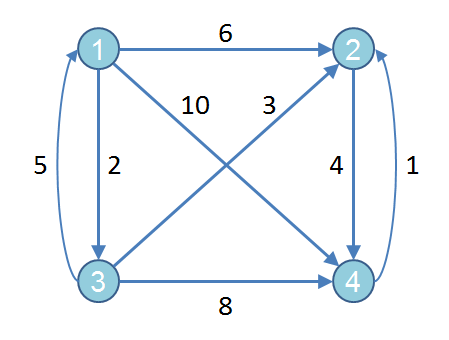
  
Sample Input:  
  
4 8  
1 2 6  
1 3 2  
1 4 10  
2 4 4  
3 1 5  
3 2 3  
3 4 8  
4 2 1  
1 4 
Sample Output:  
  
9  

In [ ]:
import heapq
from collections import defaultdict

def dijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {start: 0}
    visited = set()

    while queue:
        (dist, current) = heapq.heappop(queue)
        if current in visited:
            continue
        visited.add(current)

        if current == end:
            return dist

        for neighbor, weight in graph[current]:
            old_distance = distances.get(neighbor, float('inf'))
            new_distance = dist + weight
            if new_distance < old_distance:
                distances[neighbor] = new_distance
                heapq.heappush(queue, (new_distance, neighbor))

    return -1

def main():
    vertices, edges = map(int, input().split())
    graph = defaultdict(list)

    for _ in range(edges):
        u, v, w = map(int, input().split())
        graph[u].append((v, w))

    start, end = map(int, input().split())

    result = dijkstra(graph, start, end)
    print(result)

if __name__ == "__main__":
    main()


Реализуйте mapper в задаче поиска кратчайшего пути с помощью Hadoop Streaming.  
  
Входные и выходные данные: в качестве ключа идет номер вершины, значение состоит из двух полей, разделенных табуляцией:  
  
Минимальное расстояние до данной вершины (если его еще нет, то пишется INF)   
Список исходящих вершин (через "," в фигурных скобках)   
  
Пример работы mapper на второй итерации обработки следующего графа:  
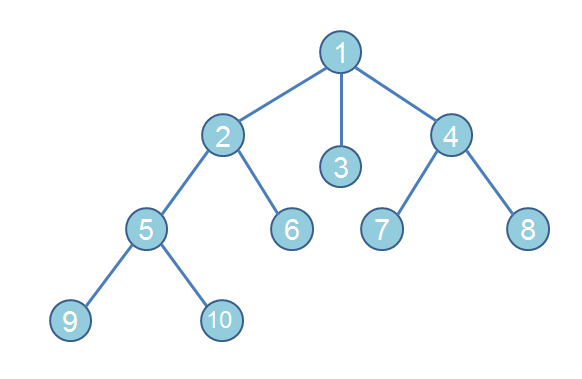

Sample Input:  
  
1	0	{2,3,4}  
2	1	{5,6}  
3	1	{}  
4	1	{7,8}  
5	INF	{9,10}  
6	INF	{}  
7	INF	{}  
8	INF	{}  
9	INF	{}  
10	INF	{}  
Sample Output:  
  
1	0	{2,3,4}  
2	1	{}  
3	1	{}  
4	1	{}  
2	1	{5,6}  
5	2	{}  
6	2	{}  
3	1	{}  
4	1	{7,8}  
7	2	{}  
8	2	{}  
5	INF	{9,10}  
9	INF	{}  
10	INF	{}  
6	INF	{}  
7	INF	{}  
8	INF	{}  
9	INF	{}  
10	INF	{}  

In [ ]:
import sys

def mapper():
    for line in sys.stdin:
        # Разделение входных данных на номер вершины, минимальное расстояние и список исходящих вершин
        node, distance, edges = line.strip().split('\t')

        # Разделение списка исходящих вершин
        edges = edges.strip('{}').split(',') if edges.strip('{}') else []

        # Вывод текущей вершины и ее значения без изменений
        print(f"{node}\t{distance}\t{{{''.join([',' + edge for edge in edges]).strip(',')}}}")

        # Обновление минимального расстояния для каждой исходящей вершины и вывод их значений
        for edge in edges:
            new_distance = 'INF' if distance == 'INF' else str(int(distance) + 1)
            print(f"{edge}\t{new_distance}\t{{}}")

if __name__ == '__main__':
    mapper()


Реализуйте reducer в задаче поиска кратчайшего пути с помощью Hadoop Streaming.  
  
Входные и выходные данные: в качестве ключа идет номер вершины, значение состоит из двух полей, разделенных табуляцией:  
  
Минимальное расстояние до данной вершины (если его еще нет, то пишется INF)  
Список исходящих вершин (через "," в фигурных скобках).    
Пример работы reducer на второй итерации обработки следующего графа:  
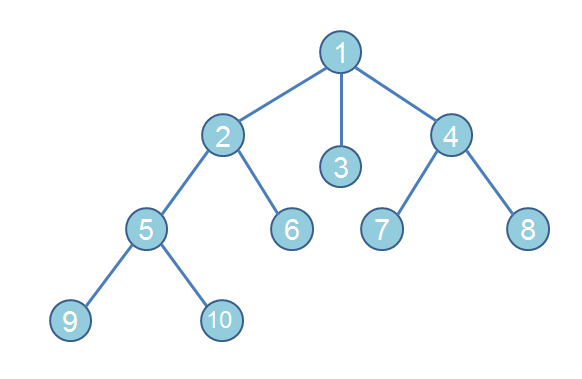
  
Sample Input:   
  
1	0	{2,3,4}  
10	INF	{}  
10	INF	{}  
2	1	{}  
2	1	{5,6}  
3	1	{}  
3	1	{}  
4	1	{}  
4	1	{7,8}  
5	2	{}  
5	INF	{9,10}   
6	2	{}  
6	INF	{}  
7	2	{}  
7	INF	{}  
8	2	{}  
8	INF	{}  
9	INF	{}  
9	INF	{}  
Sample Output:  
  
1	0	{2,3,4}  
10	INF	{}  
2	1	{5,6}  
3	1	{}  
4	1	{7,8}  
5	2	{9,10}  
6	2	{}  
7	2	{}  
8	2	{}  
9	INF	{}  

In [ ]:
import sys

def reducer():
    prev_node = None
    min_distance = float('inf')
    edges = ''

    for line in sys.stdin:
        # Разделение входных данных на номер вершины, минимальное расстояние и список исходящих вершин
        node, distance, edge_list = line.strip().split('\t')

        # Если предыдущая вершина не равна текущей, выводим результат для предыдущей вершины
        if prev_node and prev_node != node:
            print(f"{prev_node}\t{int(min_distance) if min_distance != float('inf') else 'INF'}\t{{{edges}}}")
            min_distance = float('inf')
            edges = ''

        # Обновление минимального расстояния
        if distance != 'INF':
            min_distance = min(min_distance, int(distance))

        # Обновление списка исходящих вершин, если он не пуст
        if edge_list.strip('{}'):
            edges = edge_list.strip('{}')

        prev_node = node

    # Выводим результат для последней вершины
    if prev_node:
        print(f"{prev_node}\t{int(min_distance) if min_distance != float('inf') else 'INF'}\t{{{edges}}}")

if __name__ == '__main__':
    reducer()


## 5.3 PageRank


Реализуйте mapper для алгоритма расчета PageRank с помощью Hadoop Streaming.   
  
Входные и выходные данные: В качестве ключа идет номер вершины. Значение составное: через табуляцию записано значение PageRank (округленное до 3-го знака после запятой) и список смежных вершин (через "," в фигурных скобках).  
  
Пример работы mapper приведен для графа из лекции (при этом номера вершин приведены без n):   
  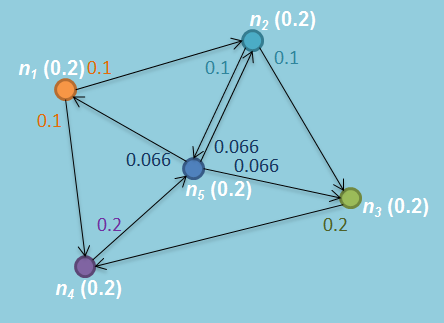
    
Sample Input:  
  
1	0.200	{2,4}  
2	0.200	{3,5}  
3	0.200	{4}  
4	0.200	{5}  
5	0.200	{1,2,3}  
Sample Output:  
  
1	0.200	{2,4}  
2	0.100	{}  
4	0.100	{}  
2	0.200	{3,5}  
3	0.100	{}  
5	0.100	{}  
3	0.200	{4}  
4	0.200	{}  
4	0.200	{5}  
5	0.200	{}  
5	0.200	{1,2,3}  
1	0.067	{}  
2	0.067	{}  
3	0.067	{}  

In [ ]:
# put your python code here
#!/usr/bin/env python

import sys

for line in sys.stdin:
    line = line.strip()
    node, pagerank, adj_list = line.split('\t')
    adj_list = adj_list.strip('{}').split(',')
    num_adj = len(adj_list)
    
    # output the current node with its own pagerank and adjacency list
    print(f"{node}\t{pagerank}\t{{{','.join(adj_list)}}}")
    
    # if the node has no outgoing links, then its pagerank is evenly distributed
    if num_adj == 0:
        continue
    
    # calculate the pagerank for each outgoing link
    pagerank_per_adj = float(pagerank) / num_adj
    
    # output the pagerank for each outgoing link with an empty adjacency list
    for adj_node in adj_list:
        print(f"{adj_node}\t{pagerank_per_adj:.3f}\t{{}}")

Реализуйте reducer для алгоритма расчета PageRank с помощью Hadoop Streaming. Используйте упрощенный алгоритм (без случайных переходов).  
  
Входные и выходные данные: В качестве ключа идет номер вершины. Значение составное: через табуляцию записано значение PageRank (округленное до 3-го знака после запятой) и список смежных вершин (через "," в фигурных скобках).
  
Пример работы reducer приведен для графа из лекции (при этом номера вершин приведены без n):  
  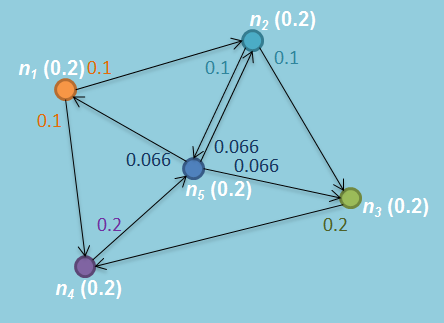
  
Sample Input:  
  
1	0.067	{}  
1	0.200	{2,4}  
2	0.067	{}  
2	0.100	{}  
2	0.200	{3,5}  
3	0.067	{}  
3	0.100	{}  
3	0.200	{4}  
4	0.100	{}  
4	0.200	{}  
4	0.200	{5}  
5	0.100	{}  
5	0.200	{}  
5	0.200	{1,2,3}  
Sample Output:  
  
1	0.067	{2,4}  
2	0.167	{3,5}  
3	0.167	{4}  
4	0.300	{5}  
5	0.300	{1,2,3}  


In [ ]:
import sys

d = {}
ag = {}

for line in sys.stdin:
    node, rank, ag_list = line.strip().split("\t")
    rank = float(rank)
    
    if ag_list == '{}':
        d[node] = f'{float(d.get(node, 0)) + rank:.3f}'
    else: ag[node] = ag_list

for node in ag.keys():
    if not d.get(node): d[node] = f'{0:.3f}'

for node in d.keys():
    if not ag.get(node): ag[node] = '{}'

d = dict(sorted(d.items()))

for node in d.keys():   
    print(node + '\t' + str(d[node]) + '\t' + ag[node])

Модифицируйте reducer из предыдущего задания так, чтобы он расcчитывал PageRank с учетом случайного перехода, т.е. первого члена в формуле:  
  
  

Для всех тестов считайте, что N = 5,  α = 0,1.  
Входные и выходные данные: В качестве ключа идет номер вершины. Значение составное: через табуляцию записано значение PageRank (округленное до 3-го знака после запятой) и список смежных вершин (через "," в фигурных скобках).
  
Пример работы reducer приведен для графа из лекции (при этом номера вершин приведены без n):  

  

Sample Input:  
   
1	0.067	{}  
1	0.200	{2,4}  
2	0.067	{}  
2	0.100	{}  
2	0.200	{3,5}  
3	0.067	{}  
3	0.100	{}  
3	0.200	{4}  
4	0.100	{}  
4	0.200	{}   
4	0.200	{5}   
5	0.100	{}   
5	0.200	{}   
5	0.200	{1,2,3}  
Sample Output:  
   
1	0.080	{2,4}   
2	0.170	{3,5}  
3	0.170	{4}  
4	0.290	{5}   
5	0.290	{1,2,3}   


In [ ]:
import sys

N = 5
alpha = 0.1
d = {}
ag = {}

for line in sys.stdin:
    node, rank, ag_list = line.strip().split("\t")
    rank = float(rank)
    
    if ag_list == '{}':
        d[node] = float(d.get(node, 0)) + rank
    else:
        ag[node] = ag_list

for node in ag.keys():
    if not d.get(node):
        d[node] = 0

for node in d.keys():
    if not ag.get(node):
        ag[node] = '{}'

d = dict(sorted(d.items()))

for node in d.keys():
    updated_rank = alpha / N + (1 - alpha) * d[node]
    print(node + '\t' + f'{updated_rank:.3f}' + '\t' + ag[node])
